# Библиотеки

In [16]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
from collections import Counter
import seaborn as sns
import statsmodels.api as sm

# Код генерации выборки

In [2]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    tip = rs.randint(low=0, high=3)
    if tip == 0:
        w = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
    if tip == 1:
        w= [1, 1, 1, 1, 1, 0, 0, 0, 0, 0][::-1]
    if tip == 2:
        w = [0]*10
    x = rs.randn(1000, 10)
    y = np.dot(x, w) + rs.randn(1000)*0.0001
    y[100:] += 10*rs.randn(900)*rs.uniform(size = 900)
    y -= np.min(y) - 0.01
    return np.hstack([y.reshape(1000,1), x])

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: egorov.sa@phystech.edu


{'mail': 'egorov.sa@phystech.edu',
 'id': 1581189463,
 'data': array([[20.85170626,  1.00754991,  2.59101298, ..., -0.4618316 ,
         -0.36714371, -0.79388664],
        [23.13968836,  0.4693312 , -1.23106117, ...,  0.51028668,
          0.36842255,  0.85743457],
        [25.06400764, -0.34669133, -1.3763102 , ..., -0.76784395,
          1.40036574,  0.91283728],
        ...,
        [20.66548795,  1.20616381, -1.85096773, ...,  0.07183426,
         -2.08852319, -0.91691094],
        [27.75034116, -1.59495286,  0.53278689, ...,  1.41377555,
          0.37813413,  2.01005682],
        [28.02748494,  0.72574386,  1.5369252 , ...,  0.45766579,
          0.40047438, -0.72774661]])}

# Работа с выборкой

In [4]:
data = pd.DataFrame(task['data'])
data.head()

0         1         2         3         4         5         6   \
0  20.851706  1.007550  2.591013  1.980620  0.185250 -1.859187  0.637818   
1  23.139688  0.469331 -1.231061  0.229116 -2.453508 -0.827903 -0.293239   
2  25.064008 -0.346691 -1.376310  0.150634 -0.031550 -0.161607  1.183196   
3  22.847238  1.315461  0.336273  1.064693 -0.106900  0.618077  2.446219   
4  23.483862  0.734159 -0.027672  0.585530  0.048624 -0.683525  0.936597   

         7         8         9         10  
0 -1.005610 -0.461832 -0.367144 -0.793887  
1 -1.145627  0.510287  0.368423  0.857435  
2 -0.507081 -0.767844  1.400366  0.912837  
3 -0.934256 -1.448756  0.930821 -0.989214  
4 -0.717582  0.235788 -0.719641  0.906227

In [5]:
column_names = list(map(lambda num: f"X{num - 1}", data.columns))
column_names[0] = 'Y'
column_names
data.columns = column_names
data.describe()

Y           X0           X1           X2           X3  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     23.153208     0.041781     0.034529     0.031731    -0.040656   
std       5.754053     0.990926     1.014311     1.005185     1.011249   
min       0.010000    -3.311592    -3.583994    -2.972529    -3.524466   
25%      20.372738    -0.619967    -0.644281    -0.656234    -0.730749   
50%      22.986983     0.082112     0.004654     0.047744    -0.012032   
75%      25.950655     0.727645     0.723157     0.711203     0.663826   
max      47.847715     2.751709     3.035866     2.861487     3.464412   

                X4           X5           X6           X7           X8  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.021736     0.011568     0.069776     0.052501     0.101195   
std       1.008219     1.023700     0.987919     0.953550     1.008092   
min      -3.179774    -3.221397    -3.352865    -3.135026    -3.137188   
25%      -0.636137    -0.635739    -0.606152    -0.565722    -0.557454   
50%       0.043318     0.029286     0.069703     0.101007     0.209402   
75%       0.674414     0.678648     0.720354     0.668214     0.761216   
max       3.603536     3.334195     3.376264     2.717052     3.489773   

                X9  
count  1000.000000  
mean      0.019088  
std       0.995165  
min      -2.909790  
25%      -0.686590  
50%       0.032202  
75%       0.684967  
max       3.174828

In [6]:
X = data.drop("Y", axis=1)
y = data["Y"]
print(X.shape, y.shape)

(1000, 10) (1000,)


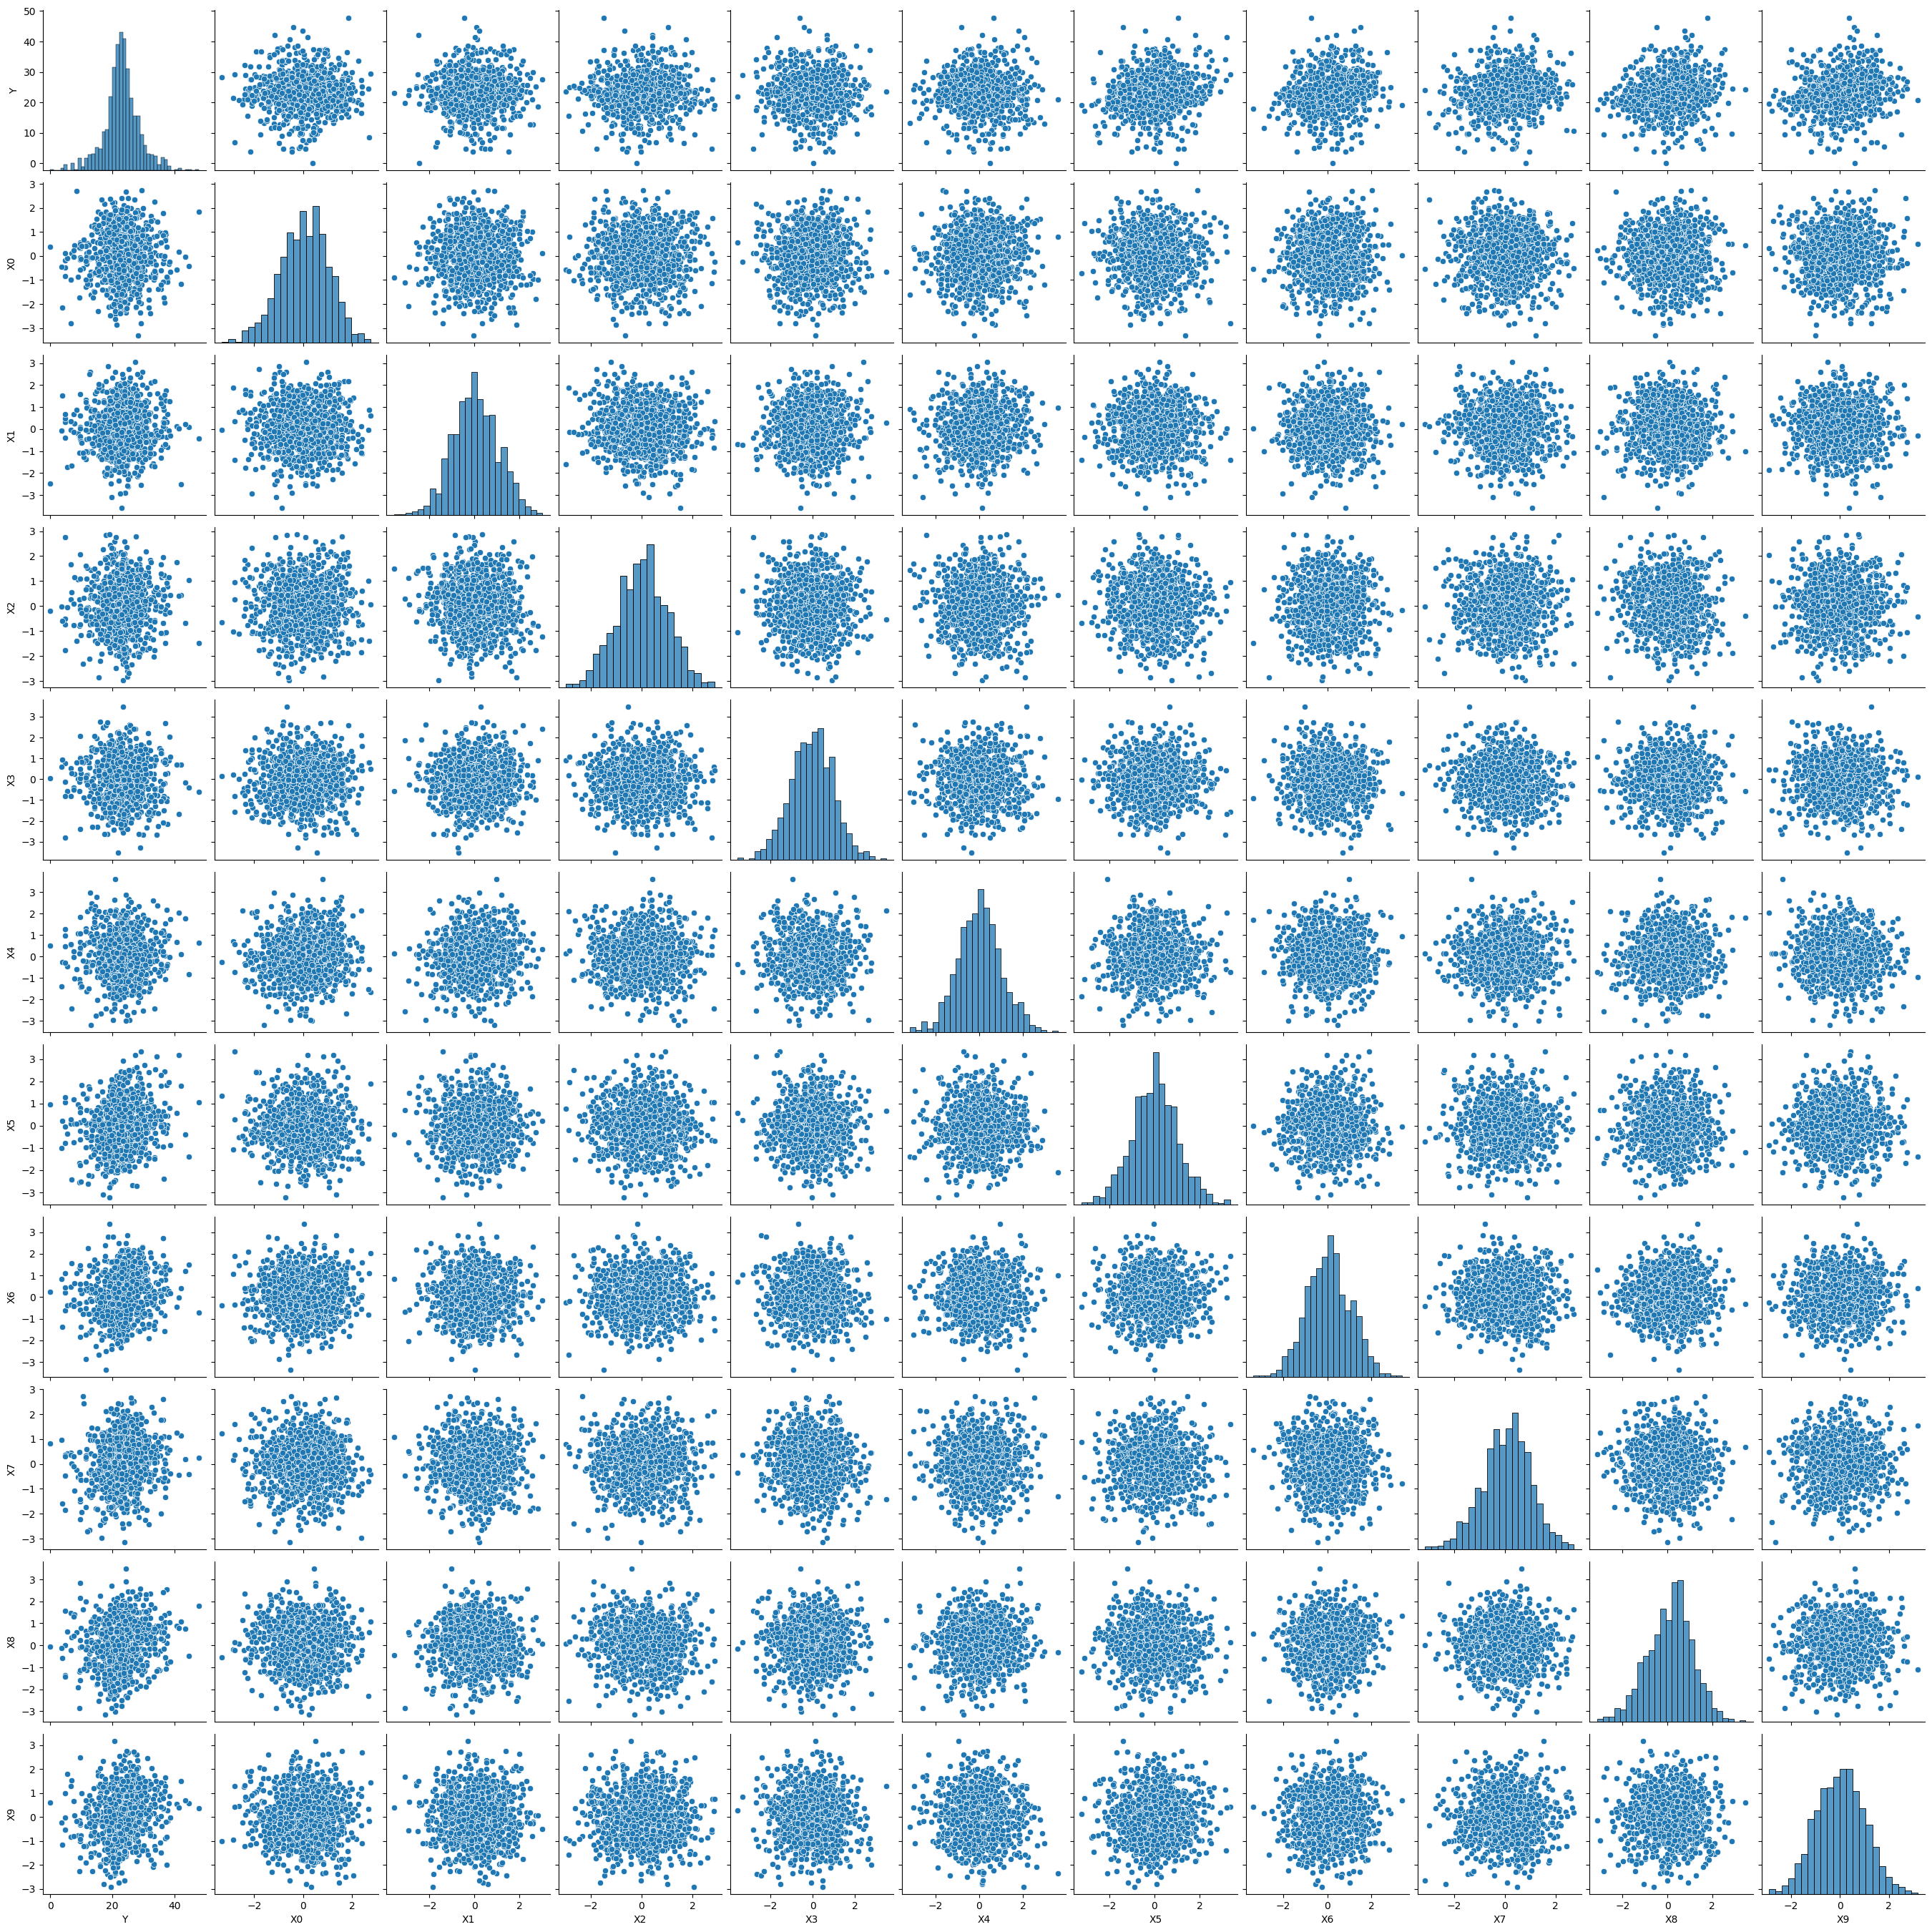

In [7]:
sns.pairplot(data)

# Задание

## Вопрос 1
Постройте линейную модель $Y$ от $X$ и свободного коэффициента. Проверьте, есть ли гетероскедастичность в выборке с использованием критерия Бройша-Пагана (использовать F-test, см. справку по критерию)

In [8]:
lin_model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     17.29
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           3.22e-29
Time:                        14:42:15   Log-Likelihood:                -3087.8
No. Observations:                1000   AIC:                             6198.
Df Residuals:                     989   BIC:                             6252.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8886      0.171    134.005      0.000      22.553      23.224
X0             0.0337      0.171      0.197      0.844      -0.301       0.369
X1             0.1746      0.167      1.044      0.297      -0.154       0.503
X2             0.2252      0.169      1.336      0.182      -0.106       0.556
X3            -0.1666      0.168     -0.995      0.320      -0.495       0.162
X4             0.0051      0.169      0.031      0.976      -0.326       0.336
X5             1.0941      0.165      6.617      0.000       0.770       1.418
X6             0.9870      0.171      5.760      0.000       0.651       1.323
X7             0.8775      0.177      4.948      0.000       0.530       1.226
X8             0.9636      0.168      5.732      0.000       0.634       1.294
X9             0.9420      0.170      5.539      0.000       0.608       1.276
==============================================================================
Omnibus:                       79.255   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.039
Skew:                          -0.234   Prob(JB):                     1.31e-72
Kurtosis:                       5.779   Cond. No.                         1.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Гетероскедастичность: одно из нарушений предпосылок Г-М, когда дисперсия ошибки зависит от номера наблюдения
2. Тест Бройша-Пагана: похож на тест Уайта, но не только с линейной зависимостью. Берём ошибки каждого фита (residuals), интерполируем многочленом (через MLE), понимаем, константа это или нет.

`het_breuschpagan` выдаёт нам p-value для f-stat 4м числом c $H_0$ о том, что гетероскедастичность есть.

In [9]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [22]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = het_breuschpagan(lin_model.resid, lin_model.model.exog)

list(zip(names, test))

[('Lagrange multiplier statistic', 19.19770032116075),
 ('p-value', 0.037822263454905754),
 ('f-value', 1.9358157728468868),
 ('f p-value', 0.03721783742181681)]

## Вопрос 2
Оптимальное значение $\lambda$ для преобразования Бокса-Кокса на переменную $Y$ (использовать `scipy.stats`)

In [23]:
from scipy import stats as st

`st.boxcox` выдаёт оптимальную $\lambda$ вторым параметром.

In [24]:
print(round(st.boxcox(y)[1], 3))

1.079


## Вопрос 3
Постройте линейную модель $Y$ от $X$ и свободного коэффициента для первых 100 элементов выборки. Сколько переменных являются избыточными согласно t-критерию? Поправку на множественность гипотез проигнорировать.


In [25]:
new_model = sm.OLS(exog=sm.add_constant(X[0:100]), endog=y[0:100]).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.226e+09
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:52:25   Log-Likelihood:                 783.64
No. Observations:                 100   AIC:                            -1545.
Df Residuals:                      89   BIC:                            -1517.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8425   1.16e-05   1.97e+06      0.000      22.842      22.843
X0         -2.963e-05   1.17e-05     -2.529      0.013   -5.29e-05   -6.35e-06
X1          4.901e-06   1.07e-05      0.460      0.647   -1.63e-05    2.61e-05
X2         -7.697e-06   1.12e-05     -0.688      0.493   -2.99e-05    1.45e-05
X3          3.025e-06   1.15e-05      0.262      0.794   -1.99e-05    2.59e-05
X4          6.323e-06   1.16e-05      0.547      0.586   -1.66e-05    2.93e-05
X5             1.0000   1.13e-05   8.83e+04      0.000       1.000       1.000
X6             1.0000      1e-05   9.99e+04      0.000       1.000       1.000
X7             1.0000   1.28e-05   7.83e+04      0.000       1.000       1.000
X8             1.0000   9.92e-06   1.01e+05      0.000       1.000       1.000
X9             1.0000   1.12e-05    8.9e+04      0.000       1.000       1.000
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.062
Skew:                          -0.309   Prob(JB):                        0.357
Kurtosis:                       3.336   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$P > |t|$ с уровнем значимости 0.05 -> первые 5 переменных незначимы. Посмотрим на графички, а то пока выглядит так себе.

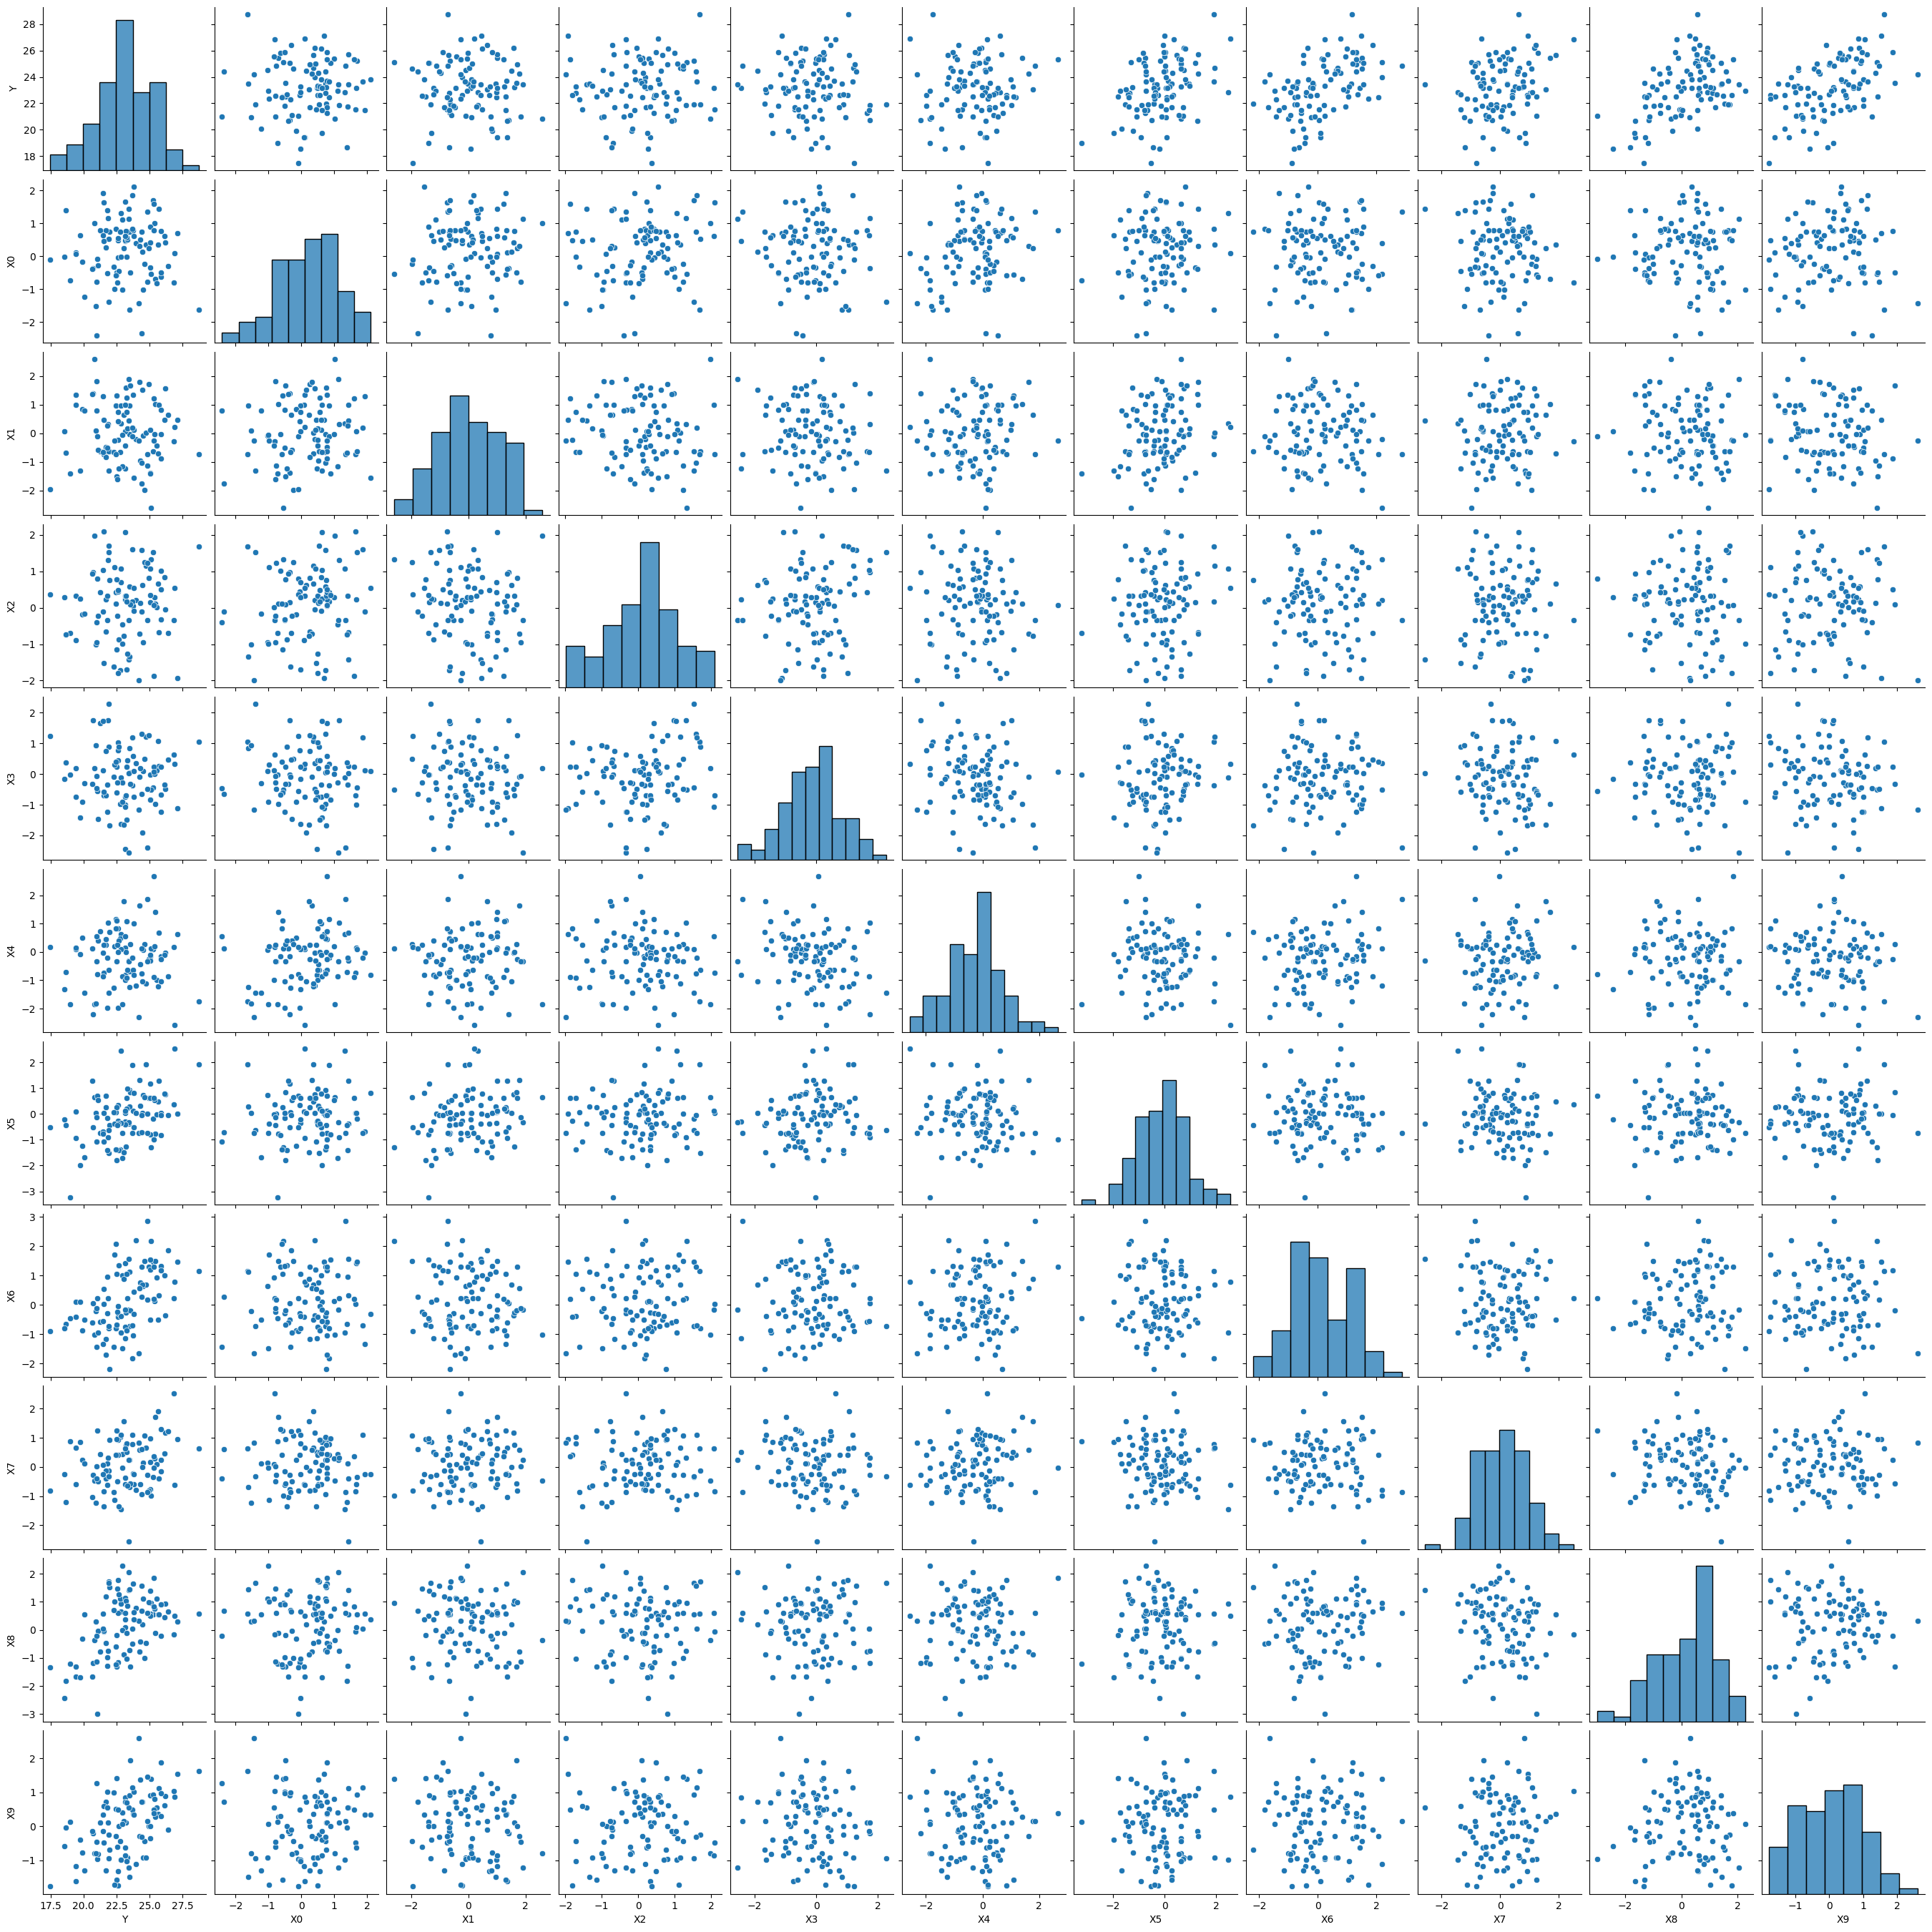

In [26]:
sns.pairplot(data[0:100])

Ничего непонятно, но очень интересно.

## Вопрос 4
Имеет ли смысл данная модель согласно F-критерию?

А. Грабовой сказал, что константа тут не нужна

In [27]:
new_model.f_test('X0 = X1 = X2 = X3 = X4 = X5 = X6 = X7 = X8 = X9 = 0').summary()

'<F test: F=4225830649.246451, p=0.0, df_denom=89, df_num=10>'

In [28]:
new_model.f_pvalue > 0.05

False

Модель не имеет смысла, ибо нулевая гипотеза, что все переменные 0 имеет нулевое `p-value`

## Вопрос 5
Можно ли обнулить первые четыре переменные согласно критерию Вальда?

In [29]:
new_model.wald_test('X0 = X1 = X2 = X3 = 0').summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


'<F test: F=array([[2.00827814]]), p=0.10012377461056256, df_denom=89, df_num=4>'

Нельзя обнулить, потому что гипотеза, что первые 4 переменные равны нулю, имеет pvalue больше 0.05